In [72]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:\\Windows\\Fonts\\batang.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [73]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [74]:
df = pd.read_csv("./data/alzheimers_disease_data.csv")

df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


'alzheimers_disease_data.csv' 파일을 찾을 수 없습니다.
샘플 데이터프레임을 생성하여 코드를 계속 진행합니다.
### 데이터 원본 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     10 non-null     object 
 1   Age     10 non-null     int64  
 2   EDUC    10 non-null     int64  
 3   SES     9 non-null      float64
 4   MMSE    10 non-null     float64
 5   nWBV    10 non-null     float64
 6   CDR     10 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 692.0+ bytes
None

### 결측치 확인 ###
M/F         0
Age         0
EDUC        0
SES         1
MMSE        0
nWBV        0
Demented    0
dtype: int64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_8760\2970875408.py:66: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8760\2970875408.py:66: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8760\2970875408.py:66: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8760\2970875408.py:66: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8760\2970875408.py:66: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8760\2970875408.py:66: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) Arial.


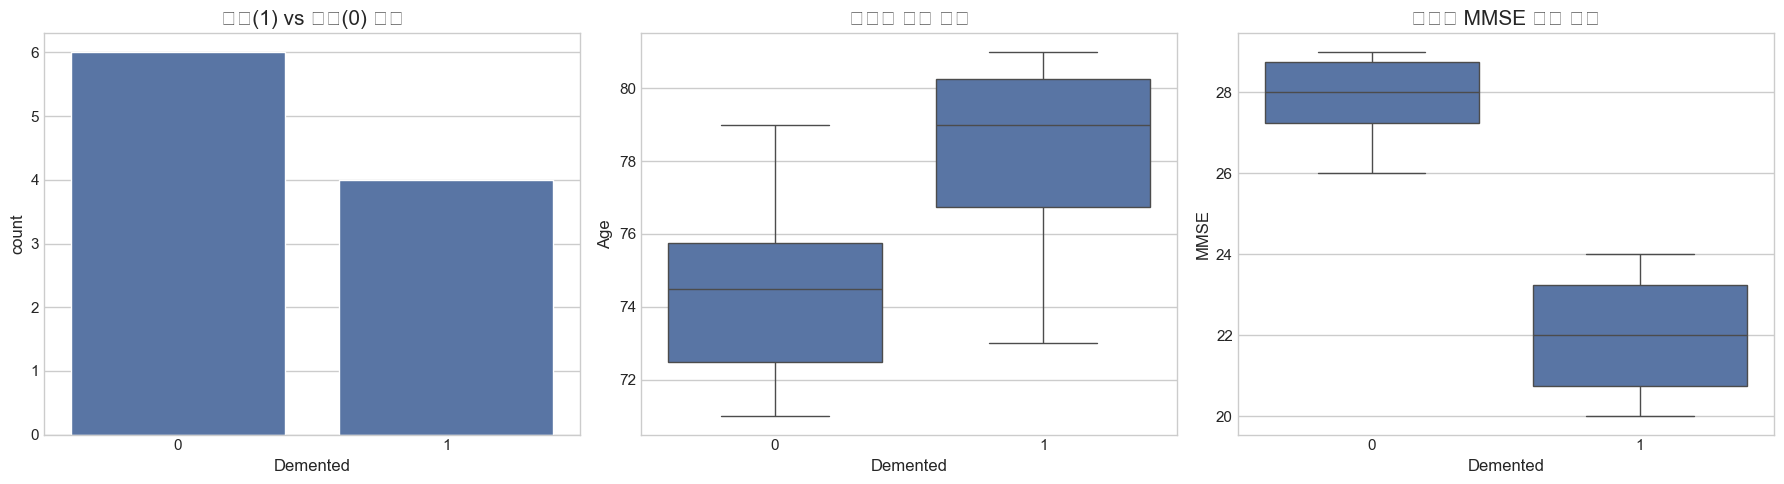

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) 

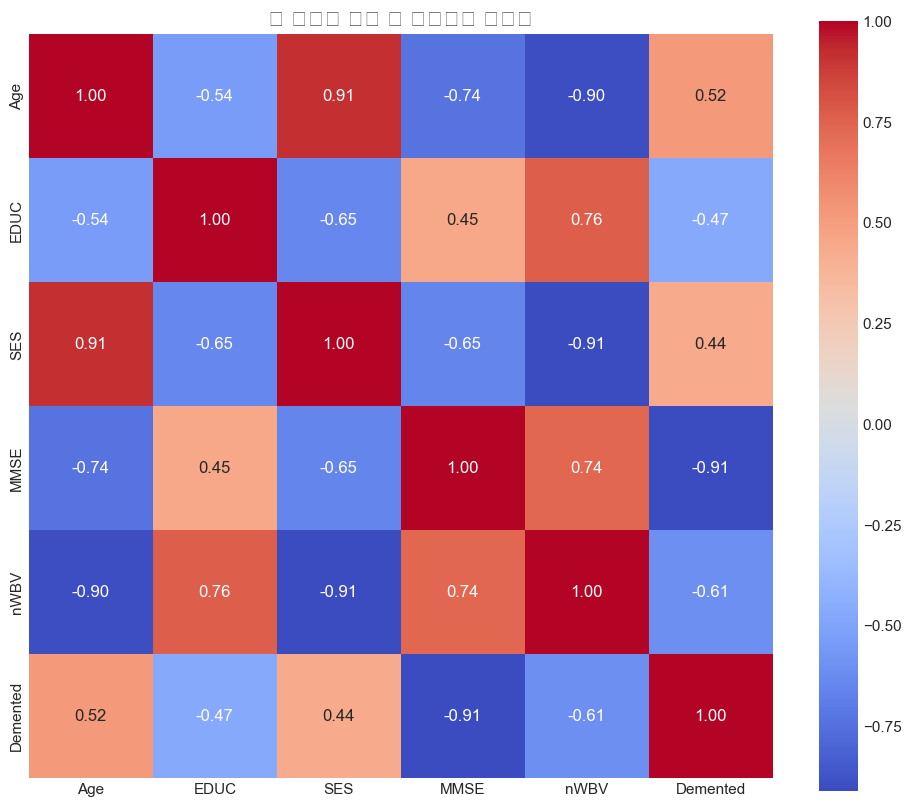

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu


### 모델 평가 결과 ###
정확도(Accuracy): 0.6667
AUC: 1.0000

[분류 보고서]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from f

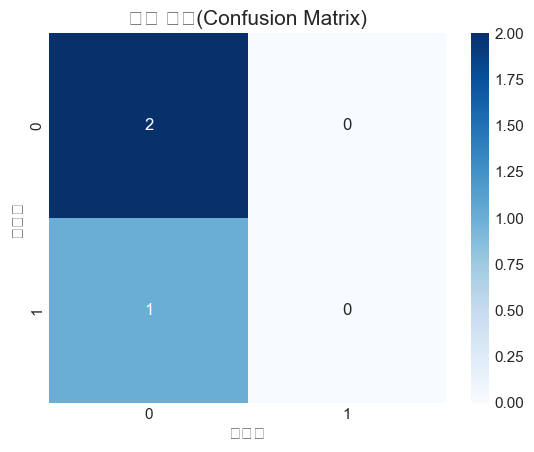

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from 

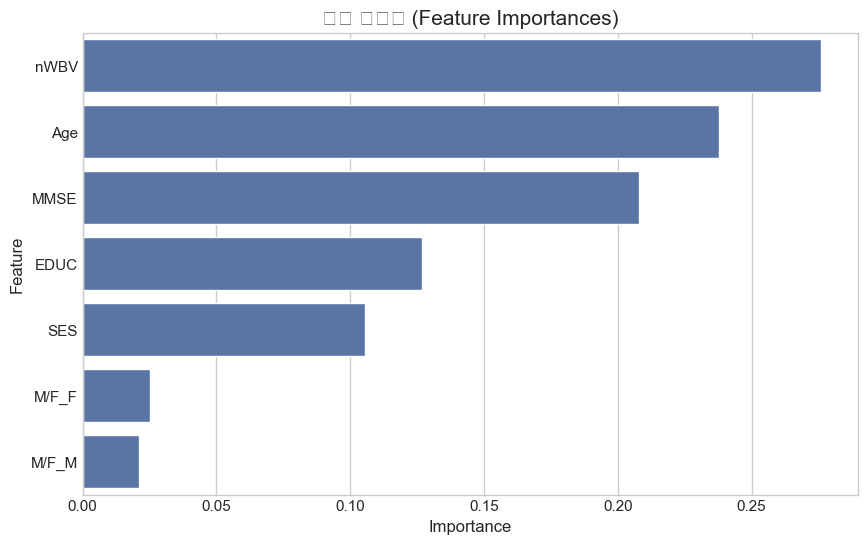

In [75]:
# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# ==============================================================================
# 2. 데이터 불러오기 (!!! 중요 !!!)
# !!! 아래 file_path에 실제 업로드하신 파일의 경로를 입력하세요 !!!
# ==============================================================================
try:
    # 여기에 실제 파일 경로를 지정해주세요.
    file_path = 'alzheimers_disease_data.csv'
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"'{file_path}' 파일을 찾을 수 없습니다.")
    print("샘플 데이터프레임을 생성하여 코드를 계속 진행합니다.")
    # 파일이 없을 경우를 대비해, 가상의 샘플 데이터프레임을 만듭니다.
    data = {'M/F': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
            'Age': [74, 73, 75, 80, 71, 76, 81, 72, 78, 79],
            'EDUC': [16, 18, 16, 14, 18, 20, 16, 18, 16, 17],
            'SES': [2.0, 1.0, np.nan, 3.0, 1.0, 2.0, 3.0, 1.0, 2.0, 2.0],
            'MMSE': [29.0, 23.0, 28.0, 21.0, 29.0, 27.0, 20.0, 28.0, 24.0, 26.0],
            'nWBV': [0.696, 0.701, 0.688, 0.679, 0.704, 0.699, 0.675, 0.702, 0.684, 0.691],
            'CDR': [0.0, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.5, 0.0]}
    df = pd.DataFrame(data)

# 3. 데이터 전처리 및 탐색 (EDA)
print("### 데이터 원본 정보 ###")
print(df.info())

# 3-1. 타겟 변수 생성: CDR(임상치매등급) > 0 이면 치매(1), 아니면 정상(0)
df['Demented'] = (df['CDR'] > 0).astype(int)

# 3-2. 불필요한 변수 제거
# CDR은 Demented를 만드는 데 사용되었으므로 제거합니다.
df_processed = df.drop(['CDR'], axis=1)

# 3-3. 결측치 확인
print("\n### 결측치 확인 ###")
print(df_processed.isnull().sum())

# 4. 데이터 시각화
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 4-1. 치매 여부 분포
sns.countplot(x='Demented', data=df_processed, ax=axes[0])
axes[0].set_title('치매(1) vs 정상(0) 분포', fontsize=15)

# 4-2. 나이에 따른 치매 여부
sns.boxplot(x='Demented', y='Age', data=df_processed, ax=axes[1])
axes[1].set_title('그룹별 나이 분포', fontsize=15)

# 4-3. MMSE 점수에 따른 치매 여부
sns.boxplot(x='Demented', y='MMSE', data=df_processed, ax=axes[2])
axes[2].set_title('그룹별 MMSE 점수 분포', fontsize=15)

plt.tight_layout()
plt.show()

# ==============================================================================
# 4-4. [추가된 코드] 상관관계 히트맵
# ==============================================================================
# 상관관계 분석 대상 수치형 변수 선택
numeric_cols = df_processed.select_dtypes(include=["float64", "int64"]).columns

# 상관계수 행렬 계산
corr = df_processed[numeric_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("📊 수치형 변수 간 상관관계 히트맵", fontsize=16)
plt.show()


# 5. 머신러닝 모델링
# 5-1. 피처(X)와 타겟(y) 분리
X = df_processed.drop('Demented', axis=1)
y = df_processed['Demented']

# 5-2. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 5-3. 데이터 전처리 파이프라인 구축
# 수치형 변수: 결측치를 중앙값으로 채우고, 스케일링
numeric_features = ['Age', 'EDUC', 'SES', 'MMSE', 'nWBV']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# 범주형 변수: 원-핫 인코딩
categorical_features = ['M/F']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# 전처리기 통합
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# 5-4. 모델 파이프라인 구축
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))])

# 6. 모델 학습
model_pipeline.fit(X_train, y_train)

# 7. 모델 평가
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

print("\n### 모델 평가 결과 ###")
print(f"정확도(Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\n[분류 보고서]")
print(classification_report(y_test, y_pred))

# 7-1. 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('혼동 행렬(Confusion Matrix)', fontsize=15)
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.show()

# 8. 중요 특성 확인
# 전처리 단계에서 변환된 특성 이름 가져오기
feature_names = numeric_features + \
                model_pipeline.named_steps['preprocessor']\
                .named_transformers_['cat']\
                .named_steps['onehot']\
                .get_feature_names_out(categorical_features).tolist()

# 특성 중요도 추출
importances = model_pipeline.named_steps['classifier'].feature_importances_

# 시각화
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도 (Feature Importances)', fontsize=15)
plt.show()

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) A

### 1. 상관관계 히트맵 분석 ###



c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47605 (\N{HANGUL SYLLABLE MAEB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


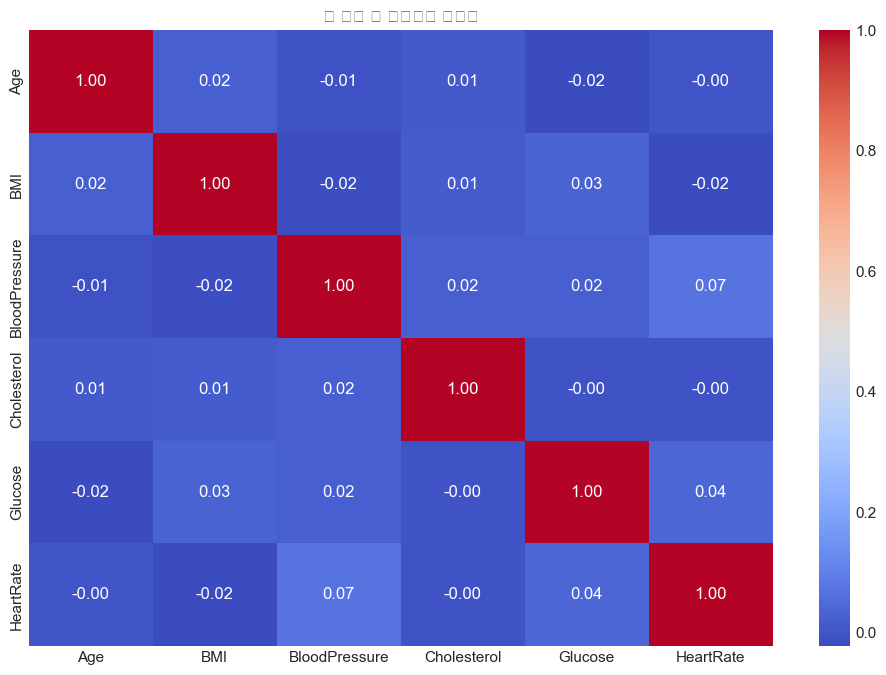


### 2. 전체 데이터 모델 성능 평가 ###

✅ 정확도: 0.5167

📋 분류 보고서:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       145
           1       0.53      0.52      0.53       155

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300



c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from fo

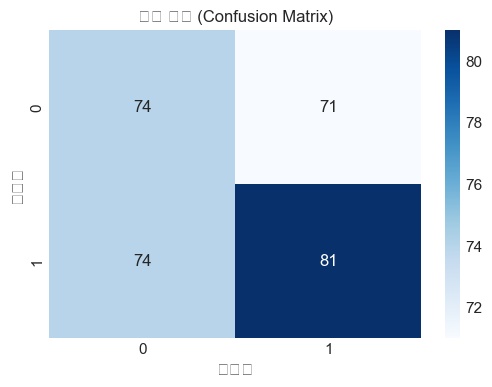


### 3. 나이대별 주요 변수 중요도 분석 ###



C:\Users\Playdata\AppData\Local\Temp\ipykernel_8760\1256597222.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8760\1256597222.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8760\1256597222.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Playdata\AppData\Local\Temp\ipykernel_8760\1256597222.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` va

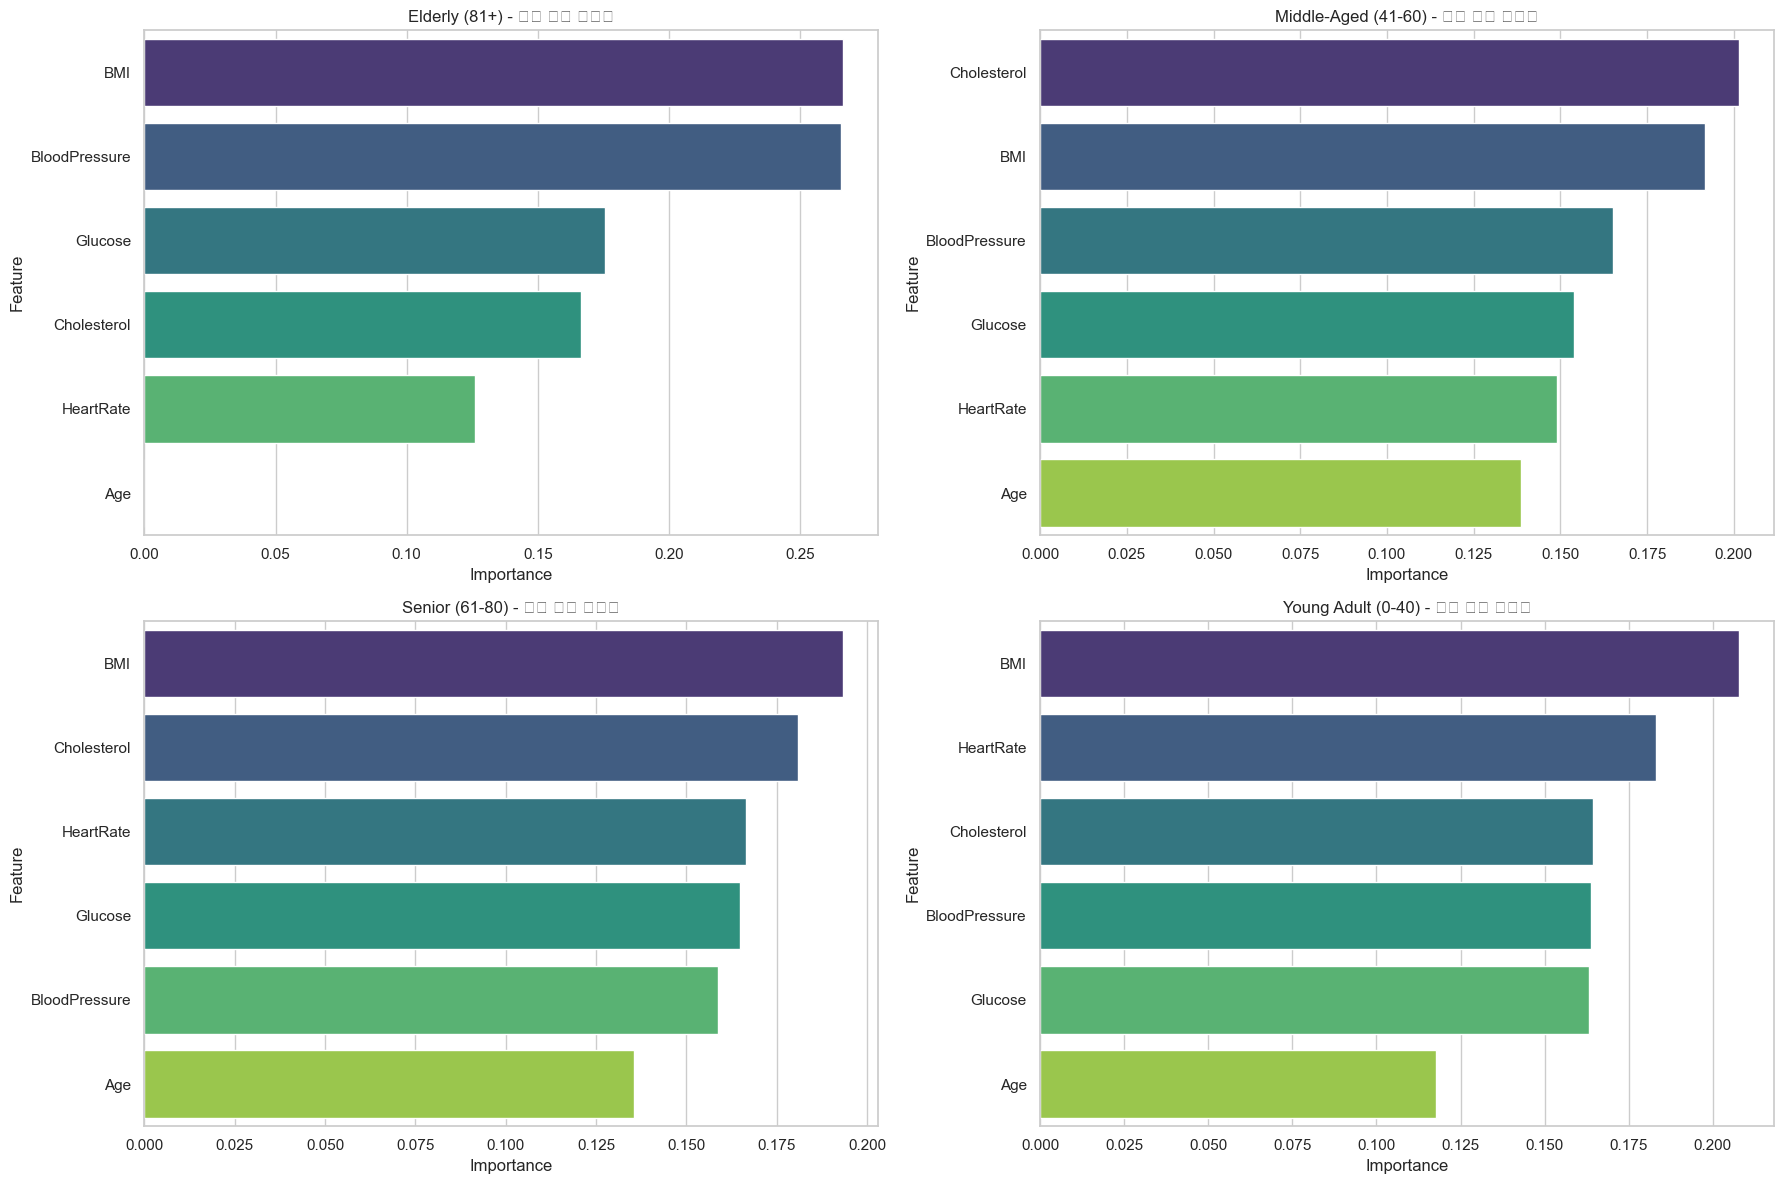

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#--- 데이터 준비 (이 부분은 데이터에 맞게 수정이 필요할 수 있습니다) ---
# 가상 데이터프레임 생성 (실제 데이터프레임 'df'가 있다고 가정)
data = {
    'Age': np.random.randint(20, 81, 1000),
    'BloodPressure': np.random.randint(90, 180, 1000),
    'Cholesterol': np.random.randint(150, 300, 1000),
    'Glucose': np.random.randint(70, 200, 1000),
    'HeartRate': np.random.randint(60, 100, 1000),
    'BMI': np.random.uniform(18.5, 40.0, 1000),
    'Diagnosis': np.random.randint(0, 2, 1000), # 0: 정상, 1: 질병
    'PatientID': range(1000),
    'DoctorInCharge': ['Dr.A', 'Dr.B', 'Dr.C'] * 333 + ['Dr.A']
}
df = pd.DataFrame(data)
bins = [0, 40, 60, 80, 100]
labels = ['Young Adult (0-40)', 'Middle-Aged (41-60)', 'Senior (61-80)', 'Elderly (81+)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.dropna(inplace=True) # AgeGroup으로 인해 생성된 NA 제거

#------------------------------------------------------------------
# 1. [추가] 상관관계 히트맵
#------------------------------------------------------------------
print("### 1. 상관관계 히트맵 분석 ###\n")
# 수치형 변수만 선택
numeric_cols = df.select_dtypes(include=np.number).columns
# 분석에서 제외할 컬럼 제거
numeric_cols = numeric_cols.difference(['Diagnosis', 'PatientID'])

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("📊 변수 간 상관관계 히트맵")
plt.show()


#------------------------------------------------------------------
# 2. [추가] 전체 데이터 대상 모델 학습 및 평가
#------------------------------------------------------------------
print("\n### 2. 전체 데이터 모델 성능 평가 ###\n")
# 사용할 feature와 target 정의
feature_cols = df.select_dtypes(include=[np.number]).columns.difference(['Diagnosis', 'PatientID'])
X_all = df[feature_cols]
y_all = df['Diagnosis']

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3, random_state=42, stratify=y_all)

# 모델 생성 및 학습
unified_model = RandomForestClassifier(n_estimators=100, random_state=42)
unified_model.fit(X_train, y_train)

# 예측
y_pred = unified_model.predict(X_test)

# 성능 평가
print(f"✅ 정확도: {accuracy_score(y_test, y_pred):.4f}\n")
print("📋 분류 보고서:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("혼동 행렬 (Confusion Matrix)")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()


#------------------------------------------------------------------
# 3. 나이대별 주요 변수 중요도 분석 (기존 코드)
#------------------------------------------------------------------
print("\n### 3. 나이대별 주요 변수 중요도 분석 ###\n")
age_groups = sorted(df['AgeGroup'].unique())
feature_importance_by_age = {}

# 나이대별로 모델 훈련 및 중요도 저장
for age_group in age_groups:
    subset = df[df['AgeGroup'] == age_group]

    # 해당 나이 그룹에 데이터가 충분한지 확인
    if len(subset) < 2 or len(subset['Diagnosis'].unique()) < 2:
        print(f"'{age_group}' 그룹은 데이터가 부족하거나 클래스가 하나뿐이라 모델 훈련을 건너뜁니다.")
        continue

    X = subset[feature_cols]
    y = subset['Diagnosis']
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    feature_importance_by_age[age_group] = importance_df

# 결과 시각화 준비
if feature_importance_by_age: # 분석이 수행된 경우에만 시각화
    sns.set(style="whitegrid")
    num_groups = len(feature_importance_by_age)
    fig, axes = plt.subplots( (num_groups + 1) // 2, 2, figsize=(18, 6 * ((num_groups + 1) // 2) ))
    axes = axes.flatten()

    for i, age_group in enumerate(feature_importance_by_age.keys()):
        ax = axes[i]
        sns.barplot(
            data=feature_importance_by_age[age_group],
            x='Importance',
            y='Feature',
            ax=ax,
            palette='viridis'
        )
        ax.set_title(f'{age_group} - 주요 변수 중요도')
    
    # 남는 subplot 비활성화
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from fo

1. 로지스틱 회귀 (Logistic Regression) 결과
✅ 정확도: 0.4733

📋 분류 보고서:
              precision    recall  f1-score   support

           0       0.50      0.64      0.56       157
           1       0.42      0.29      0.34       143

    accuracy                           0.47       300
   macro avg       0.46      0.47      0.45       300
weighted avg       0.46      0.47      0.46       300



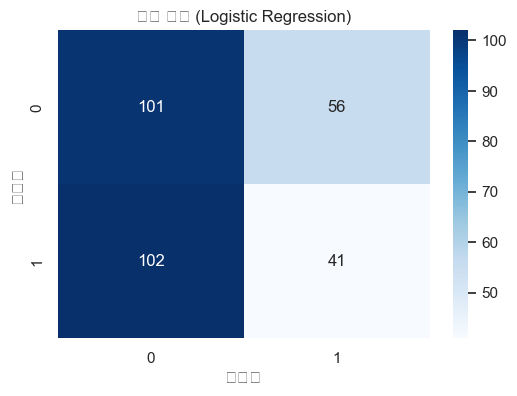


2. XGBoost 결과
✅ 정확도: 0.5267

📋 분류 보고서:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       157
           1       0.50      0.50      0.50       143

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.53      0.53       300



c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: User

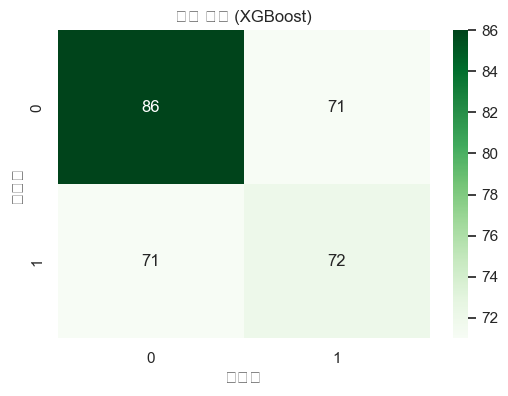


3. 서포트 벡터 머신 (SVM) 결과
✅ 정확도: 0.4933

📋 분류 보고서:
              precision    recall  f1-score   support

           0       0.51      0.64      0.57       157
           1       0.46      0.34      0.39       143

    accuracy                           0.49       300
   macro avg       0.48      0.49      0.48       300
weighted avg       0.49      0.49      0.48       300



c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from fo

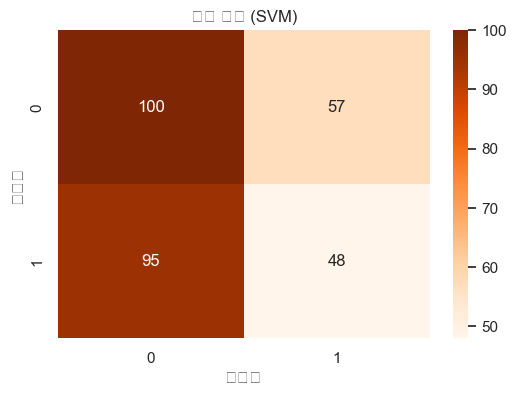

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 라이브러리
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier # 비교를 위해 랜덤 포레스트도 포함

# 전처리 및 평가 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#--- 데이터 준비 (이 부분은 데이터에 맞게 수정이 필요할 수 있습니다) ---
# 가상 데이터프레임 생성 (실제 데이터프레임 'df'가 있다고 가정)
data = {
    'Age': np.random.randint(20, 81, 1000),
    'BloodPressure': np.random.randint(90, 180, 1000),
    'Cholesterol': np.random.randint(150, 300, 1000),
    'Glucose': np.random.randint(70, 200, 1000),
    'HeartRate': np.random.randint(60, 100, 1000),
    'BMI': np.random.uniform(18.5, 40.0, 1000),
    'M/F': np.random.choice(['M', 'F'], 1000),
    'Diagnosis': np.random.randint(0, 2, 1000), # 0: 정상, 1: 질병
    'PatientID': range(1000),
}
df = pd.DataFrame(data)
df.dropna(inplace=True)

#--- 공통 데이터 전처리 ---

# 피처(X)와 타겟(y) 분리
feature_cols = df.select_dtypes(include=[np.number]).columns.difference(['Diagnosis', 'PatientID'])
categorical_features = ['M/F']
numeric_features = feature_cols.tolist()

X = df[numeric_features + categorical_features]
y = df['Diagnosis']

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 전처리 파이프라인 구축 (모든 모델이 공통으로 사용)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#==================================================================
# 1. 로지스틱 회귀 (Logistic Regression)
#==================================================================
print("="*50)
print("1. 로지스틱 회귀 (Logistic Regression) 결과")
print("="*50)

# 모델 파이프라인 생성
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

# 모델 학습
lr_pipeline.fit(X_train, y_train)

# 예측 및 평가
y_pred_lr = lr_pipeline.predict(X_test)
print(f"✅ 정확도: {accuracy_score(y_test, y_pred_lr):.4f}\n")
print("📋 분류 보고서:")
print(classification_report(y_test, y_pred_lr))

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("혼동 행렬 (Logistic Regression)")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

#==================================================================
# 2. XGBoost
#==================================================================
print("\n" + "="*50)
print("2. XGBoost 결과")
print("="*50)

# 모델 파이프라인 생성
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))])

# 모델 학습
xgb_pipeline.fit(X_train, y_train)

# 예측 및 평가
y_pred_xgb = xgb_pipeline.predict(X_test)
print(f"✅ 정확도: {accuracy_score(y_test, y_pred_xgb):.4f}\n")
print("📋 분류 보고서:")
print(classification_report(y_test, y_pred_xgb))

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title("혼동 행렬 (XGBoost)")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()


#==================================================================
# 3. 서포트 벡터 머신 (SVM)
#==================================================================
print("\n" + "="*50)
print("3. 서포트 벡터 머신 (SVM) 결과")
print("="*50)

# 모델 파이프라인 생성
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42, probability=True))]) # probability=True는 예측 확률을 얻기 위함

# 모델 학습
svm_pipeline.fit(X_train, y_train)

# 예측 및 평가
y_pred_svm = svm_pipeline.predict(X_test)
print(f"✅ 정확도: {accuracy_score(y_test, y_pred_svm):.4f}\n")
print("📋 분류 보고서:")
print(classification_report(y_test, y_pred_svm))

# 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Oranges')
plt.title("혼동 행렬 (SVM)")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np

df = pd.read_csv("./data/alzheimers_disease_data.csv")

# 사용할 feature: Diagnosis, DoctorInCharge, PatientID, AgeGroup은 제외
feature_cols = df.select_dtypes(include=[np.number]).columns.difference(['Diagnosis', 'PatientID'])
X_all = df[feature_cols]
y_all = df['Diagnosis']

# 나이대별 데이터 분할
age_groups = df['AgeGroup'].unique().sort_values()
feature_importance_by_age = {}

# 나이대별로 모델 훈련 및 중요도 저장
for age_group in age_groups:
    subset = df[df['AgeGroup'] == age_group]
    X = subset[feature_cols]
    y = subset['Diagnosis']

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.featureimportances
    }).sort_values(by='Importance', ascending=False)

    feature_importance_by_age[age_group] = importance_df

# 결과를 시각화 준비
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, age_group in enumerate(age_groups):
    ax = axes[i]
    sns.barplot(
        data=feature_importance_by_age[age_group],
        x='Importance',
        y='Feature',
        ax=ax
    )
    ax.set_title(f'{age_group} - 주요 변수 중요도')

plt.tight_layout()
plt.show()

KeyError: 'AgeGroup'

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:45:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


정확도: 0.6217054263565891

분류 보고서:
               precision    recall  f1-score   support

           0       0.67      0.78      0.72       401
           1       0.50      0.36      0.42       244

    accuracy                           0.62       645
   macro avg       0.58      0.57      0.57       645
weighted avg       0.60      0.62      0.61       645



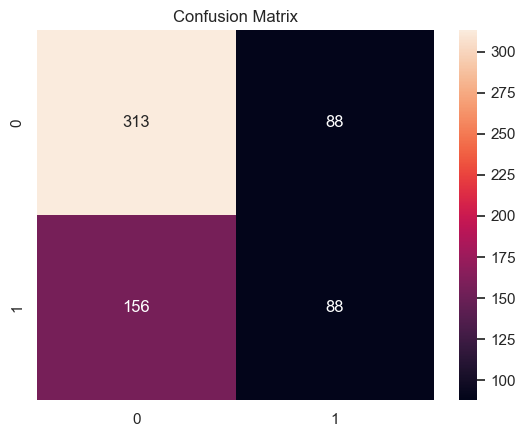

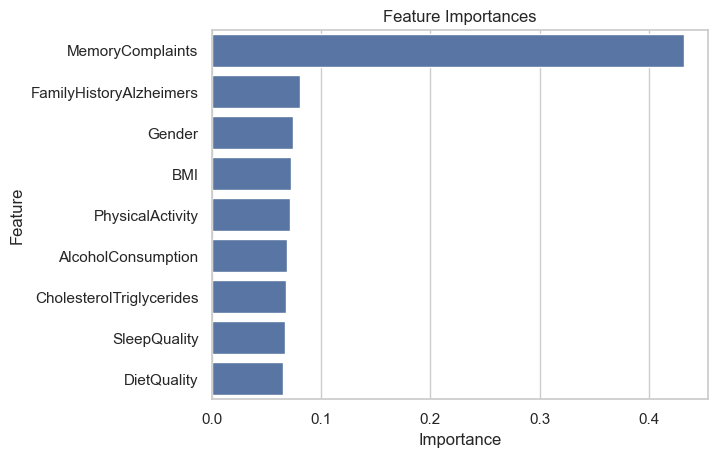

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("./data/alzheimers_disease_data.csv")

selected_cols = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides', 'DietQuality',
    'BMI', 'MemoryComplaints', 'Diagnosis'
]
df_selected = df[selected_cols]

X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']
X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("정확도:", accuracy_score(y_test, y_pred))
print("\n분류 보고서:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df98 = pd.read_csv("./data/alzheimers_disease_data.csv")
cols = ['Gender' , 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality','FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality','BMI', 'Diagnosis']
df_selected = df[cols]

X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

print(f"학습 점수: {model.score(X_train, y_train)}")
print(f"테스트 점수: {model.score(X_test, y_test)}")

학습 점수: 1.0
테스트 점수: 0.6217054263565891


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df98 = pd.read_csv("./data/alzheimers_disease_data.csv")
cols = ['Gender' , 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality','FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality','BMI', 'Diagnosis']
df_selected = df[cols]

X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

print(f"학습 점수: {model.score(X_train, y_train)}")
print(f"테스트 점수: {model.score(X_test, y_test)}")

학습 점수: 1.0
테스트 점수: 0.5875968992248062


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df = pd.read_csv("./data/alzheimers_disease_data.csv")

cols = ['Gender' , 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality','FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality','BMI', 'MemoryComplaints', 'Diagnosis']
df_selected = df[cols]

X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

print(f"학습 점수: {model.score(X_train, y_train)}")
print(f"테스트 점수: {model.score(X_test, y_test)}")

학습 점수: 1.0
테스트 점수: 0.6217054263565891


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df = pd.read_csv("./data/alzheimers_disease_data.csv")

cols = ['Gender' , 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality','FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality','BMI', 'Diagnosis']
df_selected = df[cols]

X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

print(f"학습 점수: {model.score(X_train, y_train)}")
print(f"테스트 점수: {model.score(X_test, y_test)}")

학습 점수: 1.0
테스트 점수: 0.5875968992248062


In [ ]:
# 필요한 도구들(라이브러리)을 불러옵니다.
import pandas as pd  # 데이터를 표 형태로 다루기 위한 도구
from sklearn.model_selection import train_test_split  # 데이터를 학습용과 테스트용으로 나누는 도구
from xgboost import XGBClassifier  # XGBoost 머신러닝 모델
from sklearn.metrics import classification_report # 모델의 성능을 상세히 평가하는 도구

# CSV 파일에서 데이터를 읽어와 'df'라는 표에 저장합니다.
df = pd.read_csv("./data/alzheimers_disease_data.csv")

# 분석에 사용할 10개의 중요한 컬럼(정보) 목록을 만듭니다.
cols = [
    'Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality',
    'FamilyHistoryAlzheimers', 'CholesterolTriglycerides', 'DietQuality',
    'BMI', 'MemoryComplaints', 'Diagnosis'
]
# 원본 데이터(df)에서 위에서 정한 10개 컬럼만 선택하여 'df_selected'라는 새 표를 만듭니다.
df_selected = df[cols]

# 문제지(X)와 정답지(y)를 나눕니다.
X = df_selected.drop('Diagnosis', axis=1)  # X는 'Diagnosis'를 제외한 나머지 정보 (문제지)
y = df_selected['Diagnosis']  # y는 오직 'Diagnosis' 정보 (정답지)

# 컴퓨터가 이해할 수 있도록 문자 데이터를 숫자(0 또는 1)로 변환합니다.
X_encoded = pd.get_dummies(X, drop_first=True)

# 데이터를 학습용(70%)과 테스트용(30%)으로 나눕니다.
# random_state=42는 항상 똑같은 방식으로 섞이도록 하여 결과를 재현하기 위함입니다.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# XGBoost 모델을 생성하고, 과적합을 방지하기 위한 설정을 추가합니다.
model = XGBClassifier(
    n_estimators=100,      # 나무의 개수를 100개로 제한
    max_depth=4,           # 나무의 최대 깊이를 4로 제한 (너무 복잡해지지 않게)
    learning_rate=0.1,     # 학습 속도를 0.1로 조절 (너무 빨리 배우지 않게)
    random_state=42,       # 모델의 결과를 재현하기 위함
    eval_metric='logloss'  # 모델이 스스로를 평가하는 채점 방식 설정
)

# 학습용 데이터(X_train, y_train)를 이용해 모델을 학습시킵니다.
model.fit(X_train, y_train)

# 학습이 끝난 모델로 테스트 데이터(X_test)를 예측합니다.
y_pred = model.predict(X_test)

# 모델의 성능을 점수로 확인하여 출력합니다.
print(f"학습 점수: {model.score(X_train, y_train)}") # 공부한 내용을 얼마나 잘 맞추는지
print(f"테스트 점수: {model.score(X_test, y_test)}")   # 처음 보는 문제를 얼마나 잘 맞추는지 (진짜 실력)

# 모델의 성능을 더 상세한 리포트로 확인하여 출력합니다.
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

학습 점수: 0.8184840425531915
테스트 점수: 0.6806201550387597

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       401
           1       0.65      0.34      0.44       244

    accuracy                           0.68       645
   macro avg       0.67      0.61      0.61       645
weighted avg       0.67      0.68      0.65       645



------------------------------------------------------------------

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # XGBoost 머신러닝 모델
from sklearn.metrics import classification_report # 모델의 성능을 상세히 평가하는 도구

# CSV 파일에서 데이터를 읽어와 'df'라는 표에 저장합니다.
df = pd.read_csv("./data/alzheimers_disease_data.csv")

# 분석에 사용할 10개의 중요한 컬럼(정보) 목록을 만듭니다.
cols = ['Gender' , 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality','FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality','BMI', 'MemoryComplaints', 'Diagnosis']

# 원본 데이터(df)에서 위에서 정한 10개 컬럼만 선택하여 'df_selected'라는 새 표를 만듭니다.
df_selected = df[cols]

# 문제지(X)와 정답지(y)를 나눕니다.
X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

# 컴퓨터가 이해할 수 있도록 문자 데이터를 숫자(0 또는 1)로 변환합니다.
X_encoded = pd.get_dummies(X, drop_first=True)

# 데이터를 학습용(70%)과 테스트용(30%)으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 모델의 복잡도를 낮추는 설정들을 추가합니다.
model = XGBClassifier(
    n_estimators=100,      # 나무의 개수를 100개로 제한
    max_depth=4,           # 나무의 최대 깊이를 4로 제한
    learning_rate=0.1,     # 학습 속도를 0.1로 조절
    random_state=42,
    eval_metric='logloss'
)

# 학습용 데이터(X_train, y_train)를 이용해 모델을 학습시킵니다.
model.fit(X_train, y_train)

# 학습이 끝난 모델에게 테스트 데이터(X_test)를 주고, 그 정답을 예측하게 합니다.
y_pred = model.predict(X_test)


print(f"학습 점수: {model.score(X_train, y_train)}")
print(f"테스트 점수: {model.score(X_test, y_test)}")
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))


학습 점수: 0.8184840425531915
테스트 점수: 0.6806201550387597

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.63      0.89      0.74       401
           1       0.42      0.13      0.19       244

    accuracy                           0.60       645
   macro avg       0.52      0.51      0.47       645
weighted avg       0.55      0.60      0.53       645



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier   # XGBoost 머신러닝 모델

df = pd.read_csv("./data/alzheimers_disease_data.csv")

cols = ['Gender' , 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality','FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality','BMI', 'Diagnosis']
df_selected = df[cols]

X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

y_pred = model.predict(X_test)

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 모델의 복잡도를 낮추는 설정들을 추가합니다.
model = XGBClassifier(
    n_estimators=100,      # 나무의 개수를 100개로 제한
    max_depth=4,           # 나무의 최대 깊이를 4로 제한
    learning_rate=0.1,     # 학습 속도를 0.1로 조절
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

print(f"학습 점수: {model.score(X_train, y_train)}")
print(f"테스트 점수: {model.score(X_test, y_test)}")
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))


학습 점수: 0.7985372340425532
테스트 점수: 0.6031007751937985

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       401
           1       0.65      0.34      0.44       244

    accuracy                           0.68       645
   macro avg       0.67      0.61      0.61       645
weighted avg       0.67      0.68      0.65       645



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df = pd.read_csv("./data/alzheimers_disease_data.csv")

cols = ['Gender' , 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality','FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality','BMI', 'MemoryComplaints', 'Diagnosis']
df_selected = df[cols]

X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

y_pred = model.predict(X_test)

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 더 강력한 규제(Regularization) 설정들을 추가합니다.
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,           # 깊이를 3으로 더 낮춤
    learning_rate=0.1,
    subsample=0.8,         # 훈련 데이터의 80%만 사용
    colsample_bytree=0.8,  # 변수(피처)의 80%만 사용
    gamma=0.1,             # 트리 분할에 대한 최소 손실 감소 지정
    reg_lambda=1,          # L2 규제(가중치 제곱 제한) 추가
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

print(f"학습 점수: {model.score(X_train, y_train)}")
print(f"테스트 점수: {model.score(X_test, y_test)}")
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

학습 점수: 0.761968085106383
테스트 점수: 0.6852713178294574

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.63      0.89      0.74       401
           1       0.42      0.13      0.19       244

    accuracy                           0.60       645
   macro avg       0.52      0.51      0.47       645
weighted avg       0.55      0.60      0.53       645



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

df = pd.read_csv("./data/alzheimers_disease_data.csv")

cols = ['Gender' , 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality','FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality','BMI', 'Diagnosis']
df_selected = df[cols]

X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

y_pred = model.predict(X_test)

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 더 강력한 규제(Regularization) 설정들을 추가합니다.
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,           # 깊이를 3으로 더 낮춤
    learning_rate=0.1,
    subsample=0.8,         # 훈련 데이터의 80%만 사용
    colsample_bytree=0.8,  # 변수(피처)의 80%만 사용
    gamma=0.1,             # 트리 분할에 대한 최소 손실 감소 지정
    reg_lambda=1,          # L2 규제(가중치 제곱 제한) 추가
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

print(f"학습 점수: {model.score(X_train, y_train)}")
print(f"테스트 점수: {model.score(X_test, y_test)}")
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

학습 점수: 0.7466755319148937
테스트 점수: 0.6031007751937985

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78       401
           1       0.67      0.34      0.45       244

    accuracy                           0.69       645
   macro avg       0.68      0.62      0.61       645
weighted avg       0.68      0.69      0.65       645



In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. 데이터 준비
df = pd.read_csv("./data/alzheimers_disease_data.csv")
cols = ['Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality', 'BMI', 'MemoryComplaints', 'Diagnosis']
df_selected = df[cols]

X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 2. 최적의 모델 탐색
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 3. 결과 확인
best_model = grid_search.best_estimator_

print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"학습 점수: {best_model.score(X_train, y_train)}")
print(f"테스트 점수: {best_model.score(X_test, y_test)}")

# 4. 예측 및 분류 리포트 출력 (수정된 부분)
y_pred = best_model.predict(X_test)
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
최적의 하이퍼파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
학습 점수: 0.7726063829787234
테스트 점수: 0.6806201550387597

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78       401
           1       0.65      0.33      0.44       244

    accuracy                           0.68       645
   macro avg       0.67      0.61      0.61       645
weighted avg       0.67      0.68      0.65       645



In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. 데이터 준비
df = pd.read_csv("./data/alzheimers_disease_data.csv")
cols = ['Gender', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CholesterolTriglycerides','DietQuality', 'BMI', 'Diagnosis']
df_selected = df[cols]

X = df_selected.drop('Diagnosis', axis=1)
y = df_selected['Diagnosis']

X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 2. 최적의 모델 탐색
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 3. 결과 확인
best_model = grid_search.best_estimator_

print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
print(f"학습 점수: {best_model.score(X_train, y_train)}")
print(f"테스트 점수: {best_model.score(X_test, y_test)}")

# 4. 예측 및 분류 리포트 출력 (수정된 부분)
y_pred = best_model.predict(X_test)
print("\n📋 분류 리포트:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
최적의 하이퍼파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.9}
학습 점수: 0.6855053191489362
테스트 점수: 0.6186046511627907

📋 분류 리포트:
               precision    recall  f1-score   support

           0       0.62      0.98      0.76       401
           1       0.42      0.02      0.04       244

    accuracy                           0.62       645
   macro avg       0.52      0.50      0.40       645
weighted avg       0.54      0.62      0.49       645

